In [1]:
# %matplotlib notebook
from IPython.display import display, IFrame, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib          import rc 
from matplotlib          import cm

import corner
import emcee

from tqdm import tqdm

from scipy.integrate import dblquad
from scipy.integrate import quad

In [2]:
def Gauss(p,x):
    
    mu, sigma = p
    
    return np.exp( -0.5*(x-mu)**2/sigma**2  )/np.sqrt(2*np.pi*sigma**2)

In [3]:
def LogPrior(p):
    
    mu, sigma = p
    
    if 1.75 <= mu <= 4. and 0.4 <= sigma <= 2.:
        return 0.
    else:
        return -np.inf

In [4]:
def Likelihood(p,x):
    return Gauss(p,x)

In [5]:
def JointLikelihood(p,x):
    return np.sum( np.log(Likelihood(p,x)) )

In [6]:
def LogPosterior(p,x):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLikelihood(p,x) + LogP

In [7]:
n_walkers, n_params = 5,2  #5 cadenas de Markov con 2 parámetros
p0 = np.zeros((n_walkers,n_params))
p0[:,0] = 2.
p0[:,1] = 2.
p0 += np.random.rand(n_walkers,n_params) #Walkers deben ser li
p0

array([[2.8289889 , 2.43729348],
       [2.17706827, 2.69012361],
       [2.14176318, 2.43858768],
       [2.27197658, 2.20567441],
       [2.34596146, 2.64976684]])

In [8]:
muestra = np.random.normal(2., 0.5, 1000)

In [9]:
sampler = emcee.EnsembleSampler(n_walkers,n_params,LogPosterior,args=[muestra])

In [10]:
pos, prob, state = sampler.run_mcmc(p0, 5000, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\Santiago\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [00:03<00:00, 1579.79it/s]


Text(0.5, 0, 'step number')

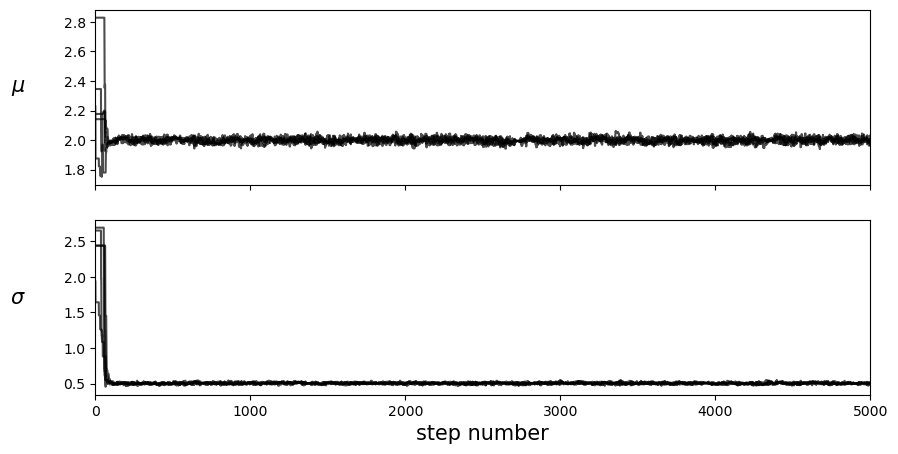

In [11]:
fig, axes = plt.subplots(n_params, figsize=(10, 5), sharex=True)

samples = sampler.get_chain()
labels = ["$\mu$","$\sigma$"]

for i in range(n_params):
    
    ax = axes[i]
    ax.plot(samples[:,:,i], "k", alpha=0.7)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i],rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number",fontsize=15)

In [12]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
truths = np.percentile(pos, 50, axis=0)

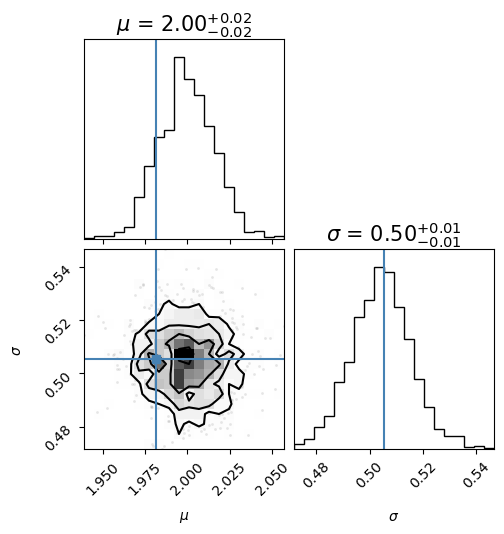

In [13]:
figure = corner.corner(flat_samples, 
                       truths=truths, 
                       labels=labels,
                       title_quantiles = None,
                       show_titles=True,
                       title_kwargs={"fontsize":15})